In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_image = cv2.imread("femi.jpg")
print(test_image)

[[[146 155 158]
  [147 156 159]
  [149 158 161]
  ...
  [139 153 159]
  [139 153 159]
  [139 153 159]]

 [[146 155 158]
  [147 156 159]
  [149 158 161]
  ...
  [139 153 159]
  [139 153 159]
  [139 153 159]]

 [[148 155 158]
  [149 156 159]
  [151 158 161]
  ...
  [139 154 157]
  [139 154 157]
  [139 154 157]]

 ...

 [[128 135 138]
  [128 135 138]
  [128 135 138]
  ...
  [135 143 143]
  [135 143 143]
  [135 143 143]]

 [[128 135 138]
  [128 135 138]
  [128 135 138]
  ...
  [136 144 144]
  [136 144 144]
  [136 144 144]]

 [[128 135 138]
  [128 135 138]
  [128 135 138]
  ...
  [136 144 144]
  [136 144 144]
  [136 144 144]]]


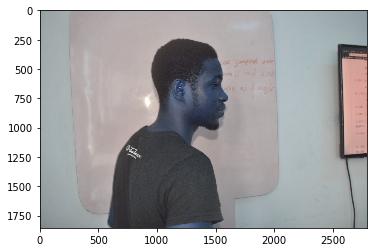

In [3]:
plt.imshow(test_image)

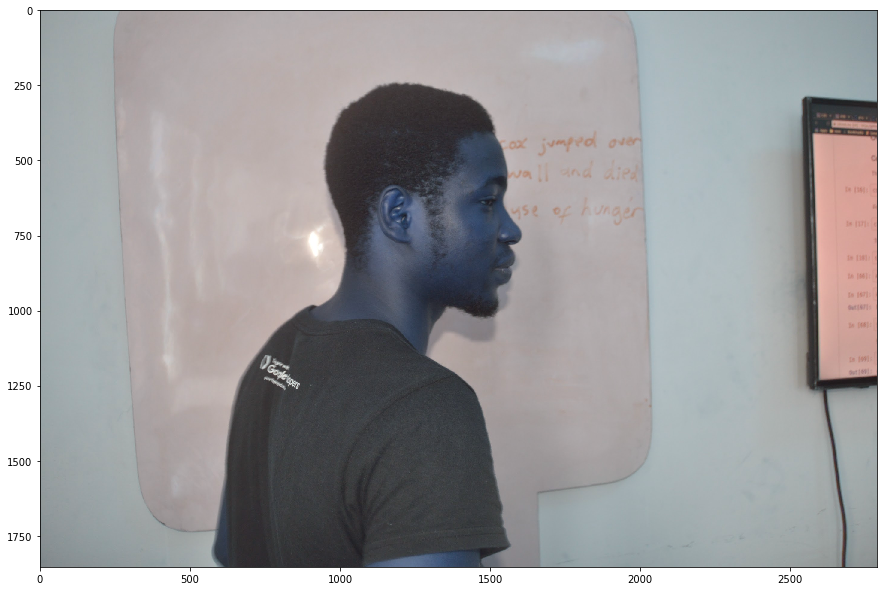

In [4]:
# Lets make the image bigger
plt.figure(figsize=(15,15))
plt.imshow(test_image)

In [5]:
# convert test image to RGB format since cv reads images in BGR format

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

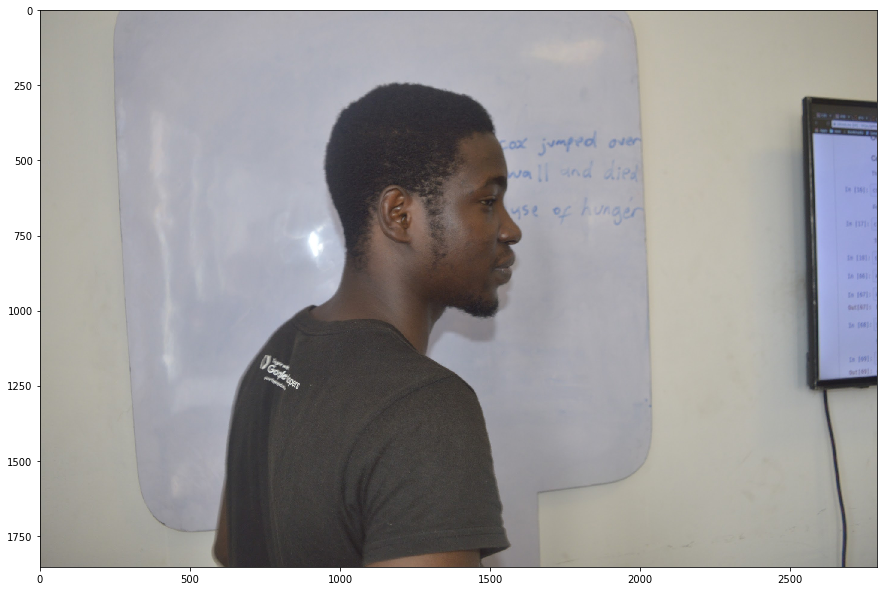

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(test_image)

In [7]:
# Skin pixel values for HSV color space
min_HSV = np.array([0, 48, 80], dtype = "uint8")
max_HSV = np.array([20, 255, 255], dtype = "uint8")

# convert image to HSV color space
hsv_image = cv2.cvtColor(test_image,cv2.COLOR_RGB2HSV)
skinRegionHSV = cv2.inRange(hsv_image, min_HSV, max_HSV)

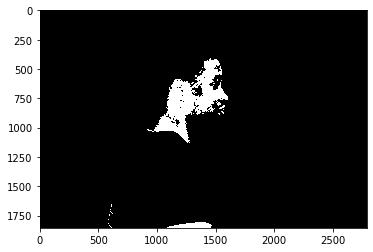

In [9]:
plt.imshow(skinRegionHSV, cmap="gray")

In [10]:
# code snippet from pyimagesearch

# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.erode(skinRegionHSV, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

# blur the mask to help remove noise, then apply the
# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

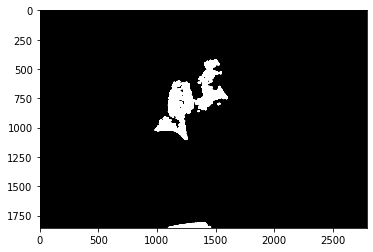

In [11]:
plt.imshow(skinMask,"gray")